**Imports**

In [1]:
import os
import psycopg2
import matplotlib.pyplot as plt

In [2]:
mot_passe = os.environ.get('pg_psw')

print(mot_passe)

Th302k18


**Connection + création DB**

In [3]:
conn = psycopg2.connect(
   database="postgres", user='postgres', password=mot_passe, host='localhost', port= '5432'
)
conn.autocommit = True

cursor = conn.cursor()

sql = '''CREATE database acde_manager''';

cursor.execute(sql)
print("Base de données créée avec succès !")

conn.close()

DuplicateDatabase: ERREUR:  la base de données « acde_manager » existe déjà


**Fonctions génériques**

In [4]:
def ouvrir_connection(nom_bdd, utilisateur, mot_passe, host='localhost', port=5432):
    try:
        conn = psycopg2.connect(dbname=nom_bdd, user=utilisateur, password=mot_passe, host=host, port=5432)
    except psycopg2.Error as e:
        print("Erreur lors de la connection à la base de données")
        print(e)
        return None
    # On force autocommit (non applicable ds SQLite3)
    conn.set_session(autocommit=True)
    return conn


def supprimer_table(conn, sql_suppression_table):
    try:
        cursor = conn.cursor()
        cursor.execute(sql_suppression_table)
        conn.commit()
    except psycopg2.Error as e:
        print("Erreur lors de la suppression de la table")
        print(e)
        return
    cursor.close()
    print("La table a été supprimée avec succès")

    
def creer_table(conn, sql_creation_table):
    try:
        cursor = conn.cursor()
        cursor.execute(sql_creation_table)
        conn.commit()
    except psycopg2.Error as e:
        print("Erreur lors de la création de la table")
        print(e)
        return
    cursor.close()
    print("La table a été crée avec succès")

    
def inserer_donnees(conn, sql_insertion_table):
    try:
        cursor = conn.cursor()
        cursor.execute(sql_insertion_table)
        conn.commit()
    except psycopg2.Error as e:
        print("Erreur lors de l'insertion des données")
        print(e)
        return
    cursor.close()
    print("Les données ont été insérées avec succès")

    
def lire_donnees(conn, sql_requete):
    try:
        cursor = conn.cursor()
        cursor.execute(sql_requete)
        conn.commit()
    except psycopg2.Error as e:
        print("Erreur lors de la lecture des données")
        print(e)
        return None
    
    print("Les données ont été lues avec succès")
    data = []
    for row in cursor:
        data.append(row)

    cursor.close()
    
    return data

def dataviz(conn, sql_dataviz):
        try:
            cursor = conn.cursor()
            cursor.execute(sql_dataviz)
            conn.commit()
        except psycopg2.Error as e:
            print("Erreur lors de la vizualisation des données")
            print(e)
            return
        
        
        ids = []
        charges = []
        for item in cursor:
            ids.append(item[0])
            charges.append(item[1])
            
        #print(charges)
        #print(ids)
        values = range(len(ids))
        print(values)
        
        # Create the plot
        plt.plot(values,charges,marker="o")
        plt.xlabel("X-Axis")
        plt.ylabel("Y-Axis")
        plt.title("Set X labels in Matplotlib Plot")
        plt.xticks(values,ids)
        plt.show()

        cursor.close()
        
        print("Les données ont été vizualisées avec succès")


**Requêtes SQL pour la table user**

In [5]:
sql_supprimer_table_user = """
    DROP TABLE IF EXISTS users;
"""

sql_creer_table_user = """
    CREATE TABLE IF NOT EXISTS users (
    id integer primary key,
    nom text,
    prenom text,
    role text,
    equipe text,
    admin int,
    activtity text,
    email text, 
    password text,
    event_id int
    );
"""

sql_inserer_user = """
    INSERT INTO users 
    (id, nom, prenom, role, equipe, admin, activity,
    email, password, event_id)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

sql_inserer_user = """
    COPY users
    (id, nom, prenom, role, equipe, admin, activity,
    email, password, event_id)
    FROM 'C:\\Users\\Public\\Documents\\acde_users.csv'
    WITH CSV DELIMITER ','
    QUOTE '"'
    HEADER;
"""

sql_inserer_user_dict = """
    INSERT INTO users 
    (id, nom, prenom, role, equipe, admin, activity,
    email, password, event_id)
    VALUES (%(id)s, %(nom)s, %(prenom)s, %(role)s, %(equipe)s, %(admin)s, %(activity)s,
    %(email)s, %(password)s, %(event_id)s);
"""

sql_lire_user = """
    SELECT *
    FROM users;
"""

**Requêtes SQL pour la table event**

In [6]:
sql_supprimer_table_event = """
    DROP TABLE IF EXISTS event;
"""

sql_creer_table_event = """
    CREATE TABLE IF NOT EXISTS event (
    id integer primary key,
    user_id integer,
    preparation decimal,
    duration decimal,
    charge integer,
    modalities text,
    need integer,
    participants integer,
    frequency integer,
    proprietaire text,
    date_first_event date,
    date_last_event date
    );
"""

sql_inserer_event = """
    INSERT INTO event 
    (id, user_id, preparation, duration, charge, modalities, need,
    participants, frequency, proprietaire, date_first_event, date_last_event)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

sql_inserer_event = """
    COPY event 
    (id, user_id, preparation, duration, charge, modalities, need,
    participants, frequency, proprietaire, date_first_event, date_last_event)
    FROM 'C:\\Users\\Public\\Documents\\acde_manager2.csv'
    WITH CSV DELIMITER ','
    QUOTE '"'
    HEADER;
"""

sql_inserer_event_dict = """
    INSERT INTO event 
    (id, user_id, preparation, duration, charge, modalities, need,
    participants, frequency, proprietaire, date_first_event, date_last_event)
    VALUES (%(id)s, %(user_id)s, %(preparation)s, %(duration)s, %(charge)s, %(modalities)s, %(need)s,
    %(particpants)s, %(frequency)s, %(proprietaire)s, %(date_first_event)s, %(date_last_event)s);
"""

sql_lire_event = """
    SELECT *
    FROM event
    LIMIT 10;
"""

sql_dataviz_event = """
    SELECT id, charge
    FROM event
    GROUP BY id
    LIMIT 10;
"""

sql_dataviz_event_2 = """
    SELECT id, charge
    FROM event
    GROUP BY id
    LIMIT 10 OFFSET 10;
"""

**Requêtes SQL pour la table list_of_events**

In [7]:
sql_supprimer_table_list_of_events = """
    DROP TABLE IF EXISTS list_of_event;
"""

sql_creer_table_list_of_events = """
    CREATE TABLE IF NOT EXISTS list_of_event (
    id integer primary key,
    name_of_instance integer,
    description text,
    event_id integer
    );
"""

sql_inserer_list_of_events = """
    INSERT INTO list_of_event 
    (id, name_of_instance, description, event_id)
    VALUES (%s, %s, %s, %s);
"""

sql_inserer_list_of_events = """
    COPY list_of_event 
    id, name_of_instance, description, event_id)
    FROM 'C:\\Users\\Public\\Documents\\acde_manager.csv'
    WITH CSV DELIMITER ','
    QUOTE '"'
    HEADER;
"""

sql_inserer_list_of_events_dict = """
    INSERT INTO list_of_event 
    (id, name_of_instance, description, event_id)
    VALUES (%(id)s, %(name_of_instance)s, %(desc)s, %(event_id)s);
"""

sql_lire_list_of_events = """
    SELECT *
    FROM list_of_event;
"""

**Requêtes SQL pour la table guest**

In [8]:
sql_supprimer_table_guest = """
    DROP TABLE IF EXISTS guest;
"""

sql_creer_table_guest = """
    CREATE TABLE IF NOT EXISTS guest (
    user_id integer,
    event_id integer
    );
"""

sql_inserer_guest = """
    INSERT INTO guest 
    (user_id, event_id)
    VALUES (%s, %s);
"""

sql_inserer_guest = """
    COPY guest 
    (user_id, event_id)
    FROM 'C:\\Users\\Public\\Documents\\acde_manager.csv'
    WITH CSV DELIMITER ','
    QUOTE '"'
    HEADER;
"""

sql_inserer_guest_dict = """
    INSERT INTO guest 
    (user_id, event_id)
    VALUES (%(user_id)s, %(event_id)s);
"""

sql_lire_guest = """
    SELECT *
    FROM guest
    LIMIT 10;
"""

**Requêtes SQL pour la table rights**

In [9]:
sql_supprimer_table_rights = """
    DROP TABLE IF EXISTS rights;
"""

sql_creer_table_rights = """
    CREATE TABLE IF NOT EXISTS rights (
    id integer primary key,
    role integer,
    user_id integer
    );
"""

sql_inserer_rights = """
    INSERT INTO rights 
    (id, role, user_id)
    VALUES (%s, %s, %s);
"""

sql_inserer_rights = """
    COPY rights 
    (id, role, user_id)
    FROM 'C:\\Users\\Public\\Documents\\acde_manager.csv'
    WITH CSV DELIMITER ','
    QUOTE '"'
    HEADER;
"""

sql_inserer_rights_dict = """
    INSERT INTO rights 
    (id, role, user_id)
    VALUES (%(id)s, %(role)s, %(user_id)s);
"""

sql_lire_rights = """
    SELECT *
    FROM rights;
"""

**Parametres bdd**

In [10]:
ma_base_donnees = "acde_manager"
utilisateur = "postgres"
mot_passe = os.environ.get('pg_psw')

**Connect BDD**

In [11]:
conn = ouvrir_connection(ma_base_donnees, utilisateur, mot_passe)

type(conn)

psycopg2.extensions.connection

**Create tables**

In [12]:
creer_table(conn, sql_creer_table_user)

La table a été crée avec succès


In [13]:
creer_table(conn, sql_creer_table_event)

La table a été crée avec succès


In [14]:
creer_table(conn, sql_creer_table_list_of_events)

La table a été crée avec succès


In [15]:
creer_table(conn, sql_creer_table_guest)

La table a été crée avec succès


In [16]:
creer_table(conn, sql_creer_table_rights)

La table a été crée avec succès


**Import CSV**

In [17]:
inserer_donnees(conn, sql_inserer_user)

Erreur lors de l'insertion des données
ERREUR:  la colonne « activity » de la relation « users » n'existe pas



In [18]:
inserer_donnees(conn, sql_inserer_event)

Les données ont été insérées avec succès


In [ ]:
inserer_donnees(conn, sql_inserer_list_of_events)

In [ ]:
inserer_donnees(conn, sql_inserer_guest)

In [ ]:
inserer_donnees(conn, sql_inserer_rights)

**Lecture data**

In [ ]:
lire_donnees(conn, sql_lire_user)

In [19]:
lire_donnees(conn, sql_lire_event)

Les données ont été lues avec succès


[(1,
  1,
  Decimal('7'),
  Decimal('9'),
  13,
  'SP',
  1,
  4,
  1,
  'Gr',
  datetime.date(2019, 10, 28),
  datetime.date(1902, 1, 14)),
 (2,
  2,
  Decimal('7'),
  Decimal('3'),
  10,
  'Pp',
  2,
  8,
  7,
  'Ne',
  datetime.date(1955, 3, 3),
  datetime.date(1966, 4, 19)),
 (3,
  3,
  Decimal('3'),
  Decimal('4'),
  1,
  'Zl',
  1,
  8,
  7,
  'cK',
  datetime.date(2019, 7, 31),
  datetime.date(2015, 12, 9)),
 (4,
  4,
  Decimal('6'),
  Decimal('4'),
  24,
  'qp',
  1,
  4,
  6,
  'cM',
  datetime.date(1961, 8, 31),
  datetime.date(1998, 1, 2)),
 (5,
  5,
  Decimal('10'),
  Decimal('6'),
  17,
  'No',
  2,
  6,
  5,
  ' S',
  datetime.date(1999, 7, 18),
  datetime.date(1990, 10, 26)),
 (6,
  6,
  Decimal('6'),
  Decimal('1'),
  21,
  'SS',
  2,
  2,
  7,
  'vV',
  datetime.date(1943, 12, 7),
  datetime.date(2005, 5, 22)),
 (7,
  7,
  Decimal('7'),
  Decimal('8'),
  17,
  'BR',
  2,
  6,
  2,
  'yc',
  datetime.date(1936, 11, 16),
  datetime.date(1990, 3, 8)),
 (8,
  8,
  Decimal(

In [ ]:
lire_donnees(conn, sql_lire_list_of_events)

In [ ]:
lire_donnees(conn, sql_lire_guest)

In [ ]:
lire_donnees(conn, sql_lire_rights)

**Delete tables**

In [ ]:
supprimer_table(conn, sql_supprimer_table_user)

In [ ]:
supprimer_table(conn, sql_supprimer_table_event)

In [ ]:
supprimer_table(conn, sql_supprimer_table_list_of_events)

In [ ]:
supprimer_table(conn, sql_supprimer_table_guest)

In [ ]:
supprimer_table(conn, sql_supprimer_table_rights)

**matplotlib dataviz event**

In [20]:
lire_donnees(conn, sql_dataviz_event)

Les données ont été lues avec succès


[(1, 13),
 (2, 10),
 (3, 1),
 (4, 24),
 (5, 17),
 (6, 21),
 (7, 17),
 (8, 21),
 (9, 8),
 (10, 23)]

range(0, 10)


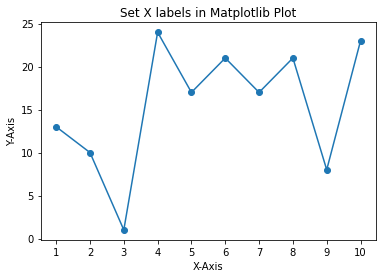

Les données ont été vizualisées avec succès


In [21]:
dataviz(conn, sql_dataviz_event)

range(0, 10)


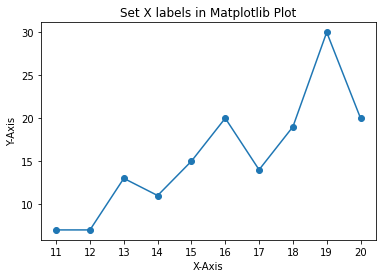

Les données ont été vizualisées avec succès


In [22]:
dataviz(conn, sql_dataviz_event_2)